# timeseries_fastai
>This repository aims to implement TimeSeries classification/regression algorithms. It makes extensive use of fastai V2!

This repo is organized as following:
- nbs: This folder contains the notebooks that build the timeseries_fastai package, refer to [nbdev](http://github.com/fastai/nbdev) doc to build.
- timeseries_fastai: the package that do the magic, You can find the documentation [here](https://tcapelle.github.io/timeseries_fastai/)
- ucr.py: a script to run the benchmarks on the UCR univariate Dataset.

## Installation

You will need to install fastai V2 from [here](https://github.com/fastai/fastai) and then you can do from within the environment where you installed fastai V2:

```bash
pip install timeseries_fastai
```

and you are good to go.

### TL;DR
```bash
git clone https://github.com/fastai/fastai
cd fastai
conda env create -f environment.yml
source activate fastai
pip install fastai timeseries_fastai

```

## Time Series Classification from Scratch with Deep Neural Networks: A Strong Baseline
The original paper repo is [here](https://github.com/cauchyturing/UCR_Time_Series_Classification_Deep_Learning_Baseline) is implemented in Keras/Tf.

- Notebook 01: This is a basic notebook that implements the Deep Learning models proposed in [Time Series Classification from Scratch with Deep Neural Networks: A Strong Baseline](https://arxiv.org/abs/1611.06455). 

## InceptionTime: Finding AlexNet for Time SeriesClassification
The original paper repo is [here](https://github.com/hfawaz/InceptionTime)

- Notebook 02: Added InceptionTime architecture from [InceptionTime: Finding AlexNet for Time SeriesClassification](https://arxiv.org/pdf/1909.04939.pdf). 

## Results

You can run the benchmark using:

`$python ucr.py --arch='inception' --tasks='all' --filename='inception.csv' --mixup=0.2`

### Default Values:
- `lr` = 1e-3
- `opt` = 'ranger'
- `epochs` = 40
- `fp16` = True

In [4]:
#hide
import pandas as pd
from pathlib import Path
from fastai.tabular.core import display_df

In [7]:
results_inception = pd.read_csv(Path.cwd().parent/'inception.csv', index_col=0)
display_df(results_inception)

,acc,acc_max,train_loss,val_loss
task,,,,
ACSF1,0.82,0.85,0.77,0.62
Adiac,0.77,0.77,0.81,0.89
ArrowHead,0.70,0.76,0.28,1.21
BME,0.85,0.88,0.21,0.79
Beef,0.77,0.83,0.50,0.53
BeetleFly,0.70,0.85,0.14,0.79
BirdChicken,0.95,0.95,0.14,0.20
CBF,0.95,0.97,0.22,0.24
Car,0.60,0.68,0.33,1.23


## Getting Started

In [8]:
from timeseries_fastai.imports import *
from timeseries_fastai.core import *
from timeseries_fastai.data import *
from timeseries_fastai.models import *

In [9]:
PATH = Path.cwd().parent

In [10]:
df_train, df_test = load_df_ucr(PATH, 'Adiac')

Loading files from: /home/tcapelle/SteadySun/timeseries_fastai/Adiac


In [11]:
x_cols = df_train.columns[0:-2].to_list()

In [12]:
dls = TSDataLoaders.from_dfs(df_train, df_test, x_cols=x_cols, label_col='target', bs=16)

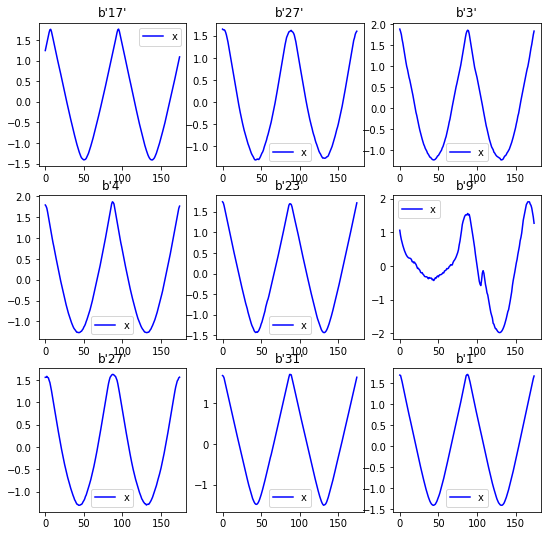

In [13]:
dls.show_batch()

In [14]:
inception = create_inception(1, len(dls.vocab))

In [15]:
learn = Learner(dls, inception, metrics=[accuracy])

In [16]:
learn.fit_one_cycle(1, 1e-3)

epoch     train_loss  valid_loss  accuracy  time    
0         3.934007    3.640701    0.043478  00:03     


# Export -

In [17]:
# hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_data.ipynb.
Converted 02_models.ipynb.
Converted 03_tabular.ipynb.
Converted 99_index.ipynb.
